In [1]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
#printing of multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
#import csv files into dataframes census and school
df_raw=pd.read_csv("census.csv",na_values=['NP',' ',None])
df_school_raw=pd.read_csv("england_ks4final.csv",na_values=['NP',' ',None],low_memory=False)
ks4_meta=pd.read_csv('ks4_meta.csv', na_values=['NP',' '])

In [15]:
#list of data
ind=[40,42,135,137,140,142]
dlst=ks4_meta.loc[ind]
dlst

,Column,Metafile heading,Metafile description,Methodology changes,Null field for special schools,Null field for local authority records,Null field for National (all schools) records,Null field for National (maintained schools) records,Unnamed: 8,Unnamed: 9
40,41,PTFSM6CLA1A,Percentage of pupils at the end of key stage 4...,NaN,NaN,NaN,Yes,NaN,NaN,NaN
42,43,PTNOTFSM6CLA1A,Percentage of pupils at the end of key stage 4...,NaN,NaN,NaN,Yes,NaN,NaN,NaN
135,136,ATT8SCR_FSM6CLA1A,Average Attainment 8 score per disadvantaged p...,NaN,NaN,NaN,Yes,NaN,NaN,NaN
137,138,P8MEA_FSM6CLA1A,Progress 8 measure - disadvantaged pupils,NaN,NaN,NaN,Yes,NaN,NaN,NaN
140,141,ATT8SCR_NFSM6CLA1A,Average Attainment 8 score per non-disadvantag...,NaN,NaN,NaN,Yes,NaN,NaN,NaN
142,143,P8MEA_NFSM6CLA1A,Progress 8 measure - non-disadvantaged pupils,NaN,NaN,NaN,Yes,NaN,NaN,NaN


In [58]:
#prepare dataframes
cols_to_keep2=["URN","LA","ESTAB","NOR","PSENELSE","PSENELK","PNUMEAL","PNUMENGFL","PNUMFSM"]
df_perc = df_raw[cols_to_keep2]
#easy way to exclude values
cols2keep = ['ESTAB','URN','NFTYPE','PTFSM6CLA1A','PTNOTFSM6CLA1A','ATT8SCR_FSM6CLA1A','P8MEA','P8MEA_FSM6CLA1A','P8MEA_NFSM6CLA1A','ATT8SCR_NFSM6CLA1A']
ValList = ('IND','INDSPEC')
df_Int=df_school_raw[cols2keep]
df_Ref=df_Int[~df_Int.NFTYPE.isin(ValList)]
df_ref=df_Ref.dropna()
df_ref[['URN']]=df_ref[['URN']].applymap(np.int)
df_ref.head()


,ESTAB,URN,NFTYPE,PTFSM6CLA1A,PTNOTFSM6CLA1A,ATT8SCR_FSM6CLA1A,P8MEA,P8MEA_FSM6CLA1A,P8MEA_NFSM6CLA1A,ATT8SCR_NFSM6CLA1A
3,4285.0,100053,CY,57%,43%,44.6,-0.26,-0.38,-0.1,57.4
4,4611.0,100054,VA,40%,60%,51,0.31,0.04,0.51,66
7,4275.0,100052,CY,58%,42%,46.2,0.09,-0.14,0.43,55.3
8,4104.0,100049,CY,75%,25%,46,-0.11,-0.13,-0.06,50
9,5401.0,100059,VA,45%,55%,52,0.41,0.13,0.63,62.1


In [59]:
df_Ref.tail()
df_Ref.dtypes

,ESTAB,URN,NFTYPE,PTFSM6CLA1A,PTNOTFSM6CLA1A,ATT8SCR_FSM6CLA1A,P8MEA,P8MEA_FSM6CLA1A,P8MEA_NFSM6CLA1A,ATT8SCR_NFSM6CLA1A
5482,7004.0,126155.0,CYS,45%,55%,0.2,-1.84,-1.92,-1.76,1.6
5485,7013.0,136114.0,FDS,37%,63%,8.7,-1.6,-1.5,-1.66,1.3
5486,NaN,NaN,NaN,17.40%,82.60%,39.4,0.1,-0.37,0.2,53.2
5487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5488,NaN,NaN,NaN,27.70%,72.30%,41.1,-0.03,-0.38,0.1,53.3


ESTAB                 float64
URN                   float64
NFTYPE                 object
PTFSM6CLA1A            object
PTNOTFSM6CLA1A         object
ATT8SCR_FSM6CLA1A      object
P8MEA                  object
P8MEA_FSM6CLA1A        object
P8MEA_NFSM6CLA1A       object
ATT8SCR_NFSM6CLA1A     object
dtype: object

In [60]:
df_ref=df_Ref.dropna()
df_ref.dtypes


ESTAB                 float64
URN                   float64
NFTYPE                 object
PTFSM6CLA1A            object
PTNOTFSM6CLA1A         object
ATT8SCR_FSM6CLA1A      object
P8MEA                  object
P8MEA_FSM6CLA1A        object
P8MEA_NFSM6CLA1A       object
ATT8SCR_NFSM6CLA1A     object
dtype: object

In [61]:
df_ref.tail()

,ESTAB,URN,NFTYPE,PTFSM6CLA1A,PTNOTFSM6CLA1A,ATT8SCR_FSM6CLA1A,P8MEA,P8MEA_FSM6CLA1A,P8MEA_NFSM6CLA1A,ATT8SCR_NFSM6CLA1A
5474,7006.0,126157.0,CYS,50%,50%,2.5,-1.63,-1.57,-1.7,0.9
5478,7010.0,126161.0,CYS,53%,47%,5.3,-1.52,-1.43,-1.62,1.4
5481,7009.0,126160.0,CYS,10%,90%,SUPP,NE,SUPP,SUPP,SUPP
5482,7004.0,126155.0,CYS,45%,55%,0.2,-1.84,-1.92,-1.76,1.6
5485,7013.0,136114.0,FDS,37%,63%,8.7,-1.6,-1.5,-1.66,1.3


In [62]:
df_ref.describe()

,ESTAB,URN
count,3852.000000,3852.000000
mean,5120.385514,127683.803738
std,1226.180318,13309.989749
min,2022.000000,100049.000000
25%,4054.000000,116440.750000
50%,4600.000000,136102.500000
75%,6905.000000,137838.250000
max,8601.000000,142331.000000


In [63]:
df_perc.describe()

,ESTAB,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
count,24288.000000,2.426200e+04,24143.000000,24245.000000,23801.000000,23801.000000,21968.000000
mean,3429.941905,6.803724e+02,7.099093,11.271553,13.559472,76.622453,15.657374
std,1550.908010,3.664141e+04,22.364031,10.452906,20.369228,32.054166,13.349106
min,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2151.000000,1.420000e+02,0.400000,5.600000,1.100000,69.900000,5.600000
50%,3073.000000,2.420000e+02,1.100000,10.000000,4.500000,92.700000,11.700000
75%,4055.000000,4.360000e+02,2.200000,15.000000,16.100000,97.800000,22.400000
max,7750.000000,4.679382e+06,100.000000,100.000000,100.000000,100.000000,100.000000


In [64]:
#save df_ref just in case
df_test=df_ref

In [65]:
df_perc.head()
df_perc.dtypes
df_perc.tail()

,URN,LA,ESTAB,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
0,100000,201,3614.0,250.0,2.8,16.0,56.3,40.3,21.1
1,100001,201,6005.0,730.0,0.0,0.0,0.0,0.0,NaN
2,100002,201,6006.0,253.0,0.4,0.0,0.0,0.0,NaN
3,100003,201,6007.0,918.0,0.0,0.0,0.0,0.0,NaN
4,100463,201,6354.0,204.0,0.0,0.0,0.0,0.0,NaN


URN           object
LA            object
ESTAB        float64
NOR          float64
PSENELSE     float64
PSENELK      float64
PNUMEAL      float64
PNUMENGFL    float64
PNUMFSM      float64
dtype: object

,URN,LA,ESTAB,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
24285,126169,938,7021.0,82.0,100.0,0.0,6.7,93.3,31.7
24286,126170,938,7022.0,54.0,85.2,14.8,0.0,100.0,46.3
24287,135814,938,7023.0,56.0,98.2,1.8,3.9,90.2,23.9
24288,NAT,PRI,NaN,4679382.0,2.6,12.0,20.0,79.8,15.4
24289,NAT,SEC,NaN,3268273.0,3.9,10.8,15.7,84.1,14.6


In [66]:
df_perc.drop(df_perc.index[24288:], inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_perc['URN']=df_perc[['URN']].applymap(np.int)
df_ref['URN']=df_ref[['URN']].applymap(np.int)
df_ref.dtypes
df_perc.dtypes

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ESTAB                 float64
URN                     int64
NFTYPE                 object
PTFSM6CLA1A            object
PTNOTFSM6CLA1A         object
ATT8SCR_FSM6CLA1A      object
P8MEA                  object
P8MEA_FSM6CLA1A        object
P8MEA_NFSM6CLA1A       object
ATT8SCR_NFSM6CLA1A     object
dtype: object

URN            int64
LA            object
ESTAB        float64
NOR          float64
PSENELSE     float64
PSENELK      float64
PNUMEAL      float64
PNUMENGFL    float64
PNUMFSM      float64
dtype: object

In [68]:
df_working=df_ref.merge(df_perc, how = 'left', on='URN')
df_working.head()

,ESTAB_x,URN,NFTYPE,PTFSM6CLA1A,PTNOTFSM6CLA1A,ATT8SCR_FSM6CLA1A,P8MEA,P8MEA_FSM6CLA1A,P8MEA_NFSM6CLA1A,ATT8SCR_NFSM6CLA1A,LA,ESTAB_y,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
0,4285.0,100053,CY,57%,43%,44.6,-0.26,-0.38,-0.1,57.4,202,4285.0,974.0,5.0,7.1,33.4,65.5,27.3
1,4611.0,100054,VA,40%,60%,51,0.31,0.04,0.51,66,202,4611.0,1006.0,1.5,8.4,40.3,59.7,17.5
2,4275.0,100052,CY,58%,42%,46.2,0.09,-0.14,0.43,55.3,202,4275.0,1205.0,2.5,11.9,57.8,42.1,22.8
3,4104.0,100049,CY,75%,25%,46,-0.11,-0.13,-0.06,50,202,4104.0,1227.0,4.2,7.7,69.8,30.2,40.4
4,5401.0,100059,VA,45%,55%,52,0.41,0.13,0.63,62.1,202,5401.0,1134.0,0.9,6.2,32.1,67.9,15.9


In [69]:
df_working.describe()
df_working.dtypes
df_working.isnull().sum()

,ESTAB_x,URN,ESTAB_y,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
count,3852.000000,3852.000000,3816.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3816.000000
mean,5120.385514,127683.803738,5108.996069,826.286763,20.353106,9.710406,14.653683,85.100629,19.428407
std,1226.180318,13309.989749,1214.436019,494.171276,38.043400,7.583322,19.156954,19.284119,14.587127
min,2022.000000,100049.000000,2022.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4054.000000,116440.750000,4054.000000,465.500000,1.000000,3.850000,2.400000,81.200000,8.100000
50%,4600.000000,136102.500000,4570.000000,854.000000,1.900000,9.000000,6.300000,93.500000,15.400000
75%,6905.000000,137838.250000,6905.000000,1175.000000,3.950000,14.000000,18.600000,97.500000,27.200000
max,8601.000000,142331.000000,7511.000000,3001.000000,100.000000,52.100000,99.000000,100.000000,82.100000


ESTAB_x               float64
URN                     int64
NFTYPE                 object
PTFSM6CLA1A            object
PTNOTFSM6CLA1A         object
ATT8SCR_FSM6CLA1A      object
P8MEA                  object
P8MEA_FSM6CLA1A        object
P8MEA_NFSM6CLA1A       object
ATT8SCR_NFSM6CLA1A     object
LA                     object
ESTAB_y               float64
NOR                   float64
PSENELSE              float64
PSENELK               float64
PNUMEAL               float64
PNUMENGFL             float64
PNUMFSM               float64
dtype: object

ESTAB_x                0
URN                    0
NFTYPE                 0
PTFSM6CLA1A            0
PTNOTFSM6CLA1A         0
ATT8SCR_FSM6CLA1A      0
P8MEA                  0
P8MEA_FSM6CLA1A        0
P8MEA_NFSM6CLA1A       0
ATT8SCR_NFSM6CLA1A     0
LA                    36
ESTAB_y               36
NOR                   37
PSENELSE              37
PSENELK               37
PNUMEAL               37
PNUMENGFL             37
PNUMFSM               36
dtype: int64

In [70]:
# function from stack overflow
#https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv 30Sept17
def p2f(x):
    if x =="SUPP":
        return x
    else:
        return float(x.strip('%'))/100


In [71]:
df_working[pd.isnull(df_working['NOR'])]

,ESTAB_x,URN,NFTYPE,PTFSM6CLA1A,PTNOTFSM6CLA1A,ATT8SCR_FSM6CLA1A,P8MEA,P8MEA_FSM6CLA1A,P8MEA_NFSM6CLA1A,ATT8SCR_NFSM6CLA1A,LA,ESTAB_y,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
118,5406.0,101563,VA,32%,68%,54,0.45,0.28,0.54,57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,4036.0,110051,CY,15%,85%,53,0.41,0.19,0.45,59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,8001.0,130602,FESI,4%,96%,SUPP,-3.54,SUPP,SUPP,SUPP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,8066.0,130418,FESI,40%,60%,12.1,LOWCOV,NE,LOWCOV,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,8000.0,130430,FESI,33%,67%,20.3,-2.6,-2.48,-2.67,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,8601.0,130434,FESI,8%,92%,1.7,LOWCOV,SUPP,LOWCOV,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,8001.0,130447,FESI,1%,99%,SUPP,LOWCOV,SUPP,SUPP,SUPP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782,4000.0,103727,FD,55%,45%,40.4,-0.2,-0.44,0.11,47.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,4113.0,104386,CY,32%,68%,46.8,0.39,0.16,0.49,56.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913,7015.0,134261,CYS,100%,0%,8.1,-2.01,-2.01,NE,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#drop rows with null values
cols=['LA','ESTAB_y','NOR','PSENELSE','PSENELK','PNUMEAL','PNUMENGFL','PNUMFSM']
df_working.dropna(subset=[cols],inplace = True)

In [73]:
df_working.describe()
df_working.dtypes
df_working.isnull().sum()

,ESTAB_x,URN,ESTAB_y,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
count,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000
mean,5109.286501,127717.546003,5109.286501,826.286763,20.353106,9.710406,14.653683,85.100629,19.433499
std,1214.462669,13327.821652,1214.462669,494.171276,38.043400,7.583322,19.156954,19.284119,14.585646
min,2022.000000,100049.000000,2022.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4054.000000,116440.500000,4054.000000,465.500000,1.000000,3.850000,2.400000,81.200000,8.100000
50%,4580.000000,136137.000000,4580.000000,854.000000,1.900000,9.000000,6.300000,93.500000,15.400000
75%,6905.000000,137850.000000,6905.000000,1175.000000,3.950000,14.000000,18.600000,97.500000,27.200000
max,7511.000000,142331.000000,7511.000000,3001.000000,100.000000,52.100000,99.000000,100.000000,82.100000


ESTAB_x               float64
URN                     int64
NFTYPE                 object
PTFSM6CLA1A            object
PTNOTFSM6CLA1A         object
ATT8SCR_FSM6CLA1A      object
P8MEA                  object
P8MEA_FSM6CLA1A        object
P8MEA_NFSM6CLA1A       object
ATT8SCR_NFSM6CLA1A     object
LA                     object
ESTAB_y               float64
NOR                   float64
PSENELSE              float64
PSENELK               float64
PNUMEAL               float64
PNUMENGFL             float64
PNUMFSM               float64
dtype: object

ESTAB_x               0
URN                   0
NFTYPE                0
PTFSM6CLA1A           0
PTNOTFSM6CLA1A        0
ATT8SCR_FSM6CLA1A     0
P8MEA                 0
P8MEA_FSM6CLA1A       0
P8MEA_NFSM6CLA1A      0
ATT8SCR_NFSM6CLA1A    0
LA                    0
ESTAB_y               0
NOR                   0
PSENELSE              0
PSENELK               0
PNUMEAL               0
PNUMENGFL             0
PNUMFSM               0
dtype: int64

In [74]:

cols=["PSENELSE","PSENELK","PNUMEAL","PNUMENGFL","PNUMFSM"]
df_working[cols]=df_working[cols].applymap(np.float64)


In [75]:
cols6 = ['PTFSM6CLA1A','PTNOTFSM6CLA1A']
df_working[cols6]=df_working[cols6].applymap(p2f)

In [76]:
df_working['ATT8SCR_FSM6CLA1A'].str.contains('SUPP').sum()
df_working['ATT8SCR_FSM6CLA1A'].str.contains('LOWCOV').sum()
df_working['PTFSM6CLA1A'].str.contains('SUPP').sum()
df_working['PTFSM6CLA1A'].str.contains('LOWCOV').sum()

560

0

123

0

In [77]:
cols7=['ATT8SCR_FSM6CLA1A','P8MEA_FSM6CLA1A','P8MEA','P8MEA_NFSM6CLA1A','ATT8SCR_NFSM6CLA1A']
for cols in cols7:
    df_working[cols]=pd.to_numeric(df_working[cols], errors='coerce')


In [78]:
for col in cols:
    df_working[cols]=pd.to_numeric(df_working[cols], errors='coerce')

In [79]:
df_working.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ESTAB_x,3815.0,5109.286501,1214.462669,2022.00,4054.00,4580.000,6905.00,7511.00
URN,3815.0,127717.546003,13327.821652,100049.00,116440.50,136137.000,137850.00,142331.00
ATT8SCR_FSM6CLA1A,3196.0,40.975094,11.884987,0.00,37.90,42.200,46.60,78.20
P8MEA,3450.0,-0.222386,0.710957,-3.66,-0.36,-0.045,0.20,1.37
P8MEA_FSM6CLA1A,3174.0,-0.416074,0.576720,-3.60,-0.70,-0.360,-0.04,1.31
P8MEA_NFSM6CLA1A,3149.0,0.001874,0.517963,-3.43,-0.15,0.090,0.30,1.39
ATT8SCR_NFSM6CLA1A,3175.0,49.981354,12.613660,0.00,48.30,52.200,55.60,78.50
ESTAB_y,3815.0,5109.286501,1214.462669,2022.00,4054.00,4580.000,6905.00,7511.00
NOR,3815.0,826.286763,494.171276,10.00,465.50,854.000,1175.00,3001.00
PSENELSE,3815.0,20.353106,38.043400,0.00,1.00,1.900,3.95,100.00


In [81]:
df_working.to_csv('DataFrame_workTD.csv')

In [82]:
df_working.corr()

,ESTAB_x,URN,ATT8SCR_FSM6CLA1A,P8MEA,P8MEA_FSM6CLA1A,P8MEA_NFSM6CLA1A,ATT8SCR_NFSM6CLA1A,ESTAB_y,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
ESTAB_x,1.000000,-0.107239,-0.392974,-0.531292,-0.271848,-0.362950,-0.463855,1.000000,-0.485585,0.762356,-0.393158,0.011579,-0.012386,0.553539
URN,-0.107239,1.000000,0.082231,0.136726,0.057985,0.068982,0.088677,-0.107239,0.169810,-0.238622,0.105312,-0.162241,0.161205,-0.245965
ATT8SCR_FSM6CLA1A,-0.392974,0.082231,1.000000,0.863424,0.831942,0.826255,0.927879,-0.392974,0.496685,-0.803702,0.115313,0.175597,-0.175450,-0.528391
P8MEA,-0.531292,0.136726,0.863424,1.000000,0.917454,0.975838,0.865555,-0.531292,0.602601,-0.816756,0.221104,0.199893,-0.199483,-0.659018
P8MEA_FSM6CLA1A,-0.271848,0.057985,0.831942,0.917454,1.000000,0.842964,0.710181,-0.271848,0.405277,-0.596889,0.106634,0.299555,-0.299292,-0.354138
P8MEA_NFSM6CLA1A,-0.362950,0.068982,0.826255,0.975838,0.842964,1.000000,0.869667,-0.362950,0.469812,-0.741421,0.127869,0.210167,-0.208979,-0.419370
ATT8SCR_NFSM6CLA1A,-0.463855,0.088677,0.927879,0.865555,0.710181,0.869667,1.000000,-0.463855,0.539888,-0.881743,0.125136,0.047208,-0.046662,-0.584405
ESTAB_y,1.000000,-0.107239,-0.392974,-0.531292,-0.271848,-0.362950,-0.463855,1.000000,-0.485585,0.762356,-0.393158,0.011579,-0.012386,0.553539
NOR,-0.485585,0.169810,0.496685,0.602601,0.405277,0.469812,0.539888,-0.485585,1.000000,-0.703882,0.219841,0.090363,-0.090750,-0.567257
PSENELSE,0.762356,-0.238622,-0.803702,-0.816756,-0.596889,-0.741421,-0.881743,0.762356,-0.703882,1.000000,-0.525026,-0.067487,0.067841,0.655098


In [83]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Axes(0.125,0.125;0.62x0.755)


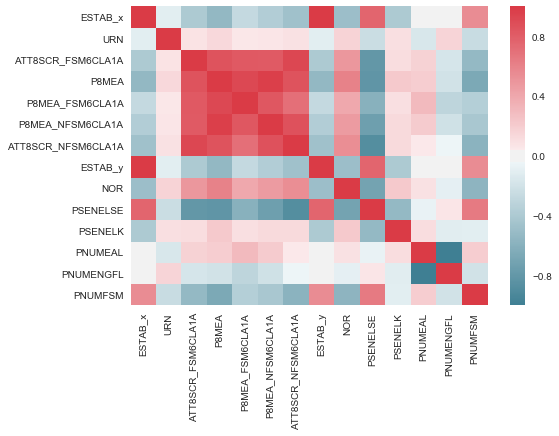

In [85]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_working.corr()
print sns.heatmap(correlations, cmap=cmap)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5DD668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3EE5F8>]], dtype=object)

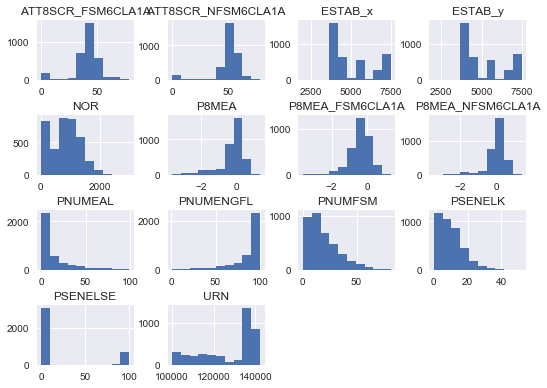

In [86]:
import pylab as pl
df_working.hist()
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.60,
                    wspace=0.35)
pl.show()

In [97]:
#function to make new column if P8measure > disadvantaged P8measure
import math


def P8diff(x,y):
    if math.isnan(x) or math.isnan(y):
        return -99
    elif x< y:
        return 0
    else:
        return 1
    

In [100]:
df_working['P8diff']=df_working.apply(lambda x: P8diff(x['P8MEA'],y['P8MEA_FSM6CLA1A'],axis = 1))

KeyError: ('P8MEA', u'occurred at index ESTAB_x')

In [94]:
df_working['P8MEA'].describe()

count    3450.000000
mean       -0.222386
std         0.710957
min        -3.660000
25%        -0.360000
50%        -0.045000
75%         0.200000
max         1.370000
Name: P8MEA, dtype: float64

In [101]:

df_working[['ESTAB_x','P8MEA']]

,ESTAB_x,P8MEA
0,4285.0,-0.26
1,4611.0,0.31
2,4275.0,0.09
3,4104.0,-0.11
4,5401.0,0.41
5,4652.0,0.16
6,4166.0,0.18
7,4196.0,-0.15
8,4688.0,-0.37
9,7137.0,NaN


In [103]:
df_working.isnull().sum()

ESTAB_x                 0
URN                     0
NFTYPE                  0
PTFSM6CLA1A             0
PTNOTFSM6CLA1A          0
ATT8SCR_FSM6CLA1A     619
P8MEA                 365
P8MEA_FSM6CLA1A       641
P8MEA_NFSM6CLA1A      666
ATT8SCR_NFSM6CLA1A    640
LA                      0
ESTAB_y                 0
NOR                     0
PSENELSE                0
PSENELK                 0
PNUMEAL                 0
PNUMENGFL               0
PNUMFSM                 0
dtype: int64

In [105]:
df_working.dropna(subset=['P8MEA'],inplace = True)
df_working.isnull().sum()

ESTAB_x                 0
URN                     0
NFTYPE                  0
PTFSM6CLA1A             0
PTNOTFSM6CLA1A          0
ATT8SCR_FSM6CLA1A     258
P8MEA                   0
P8MEA_FSM6CLA1A       276
P8MEA_NFSM6CLA1A      301
ATT8SCR_NFSM6CLA1A    278
LA                      0
ESTAB_y                 0
NOR                     0
PSENELSE                0
PSENELK                 0
PNUMEAL                 0
PNUMENGFL               0
PNUMFSM                 0
dtype: int64

In [106]:
df_working['P8diff']=df_working.apply(lambda x: P8diff(x['P8MEA'],y['P8MEA_FSM6CLA1A'],axis = 1))

KeyError: ('P8MEA', u'occurred at index ESTAB_x')

In [126]:
P8 = df_working[['URN','P8MEA']]
P8Dis=df_working[['ESTAB_x','URN','P8MEA','P8MEA_FSM6CLA1A']]

P8.describe()
P8Dis.describe()

,URN,P8MEA
count,3450.000000,3450.000000
mean,128450.322609,-0.222386
std,13139.769070,0.710957
min,100049.000000,-3.660000
25%,117537.250000,-0.360000
50%,136367.500000,-0.045000
75%,137910.250000,0.200000
max,142331.000000,1.370000


,ESTAB_x,URN,P8MEA,P8MEA_FSM6CLA1A
count,3450.000000,3450.000000,3450.000000,3174.000000
mean,4915.677971,128450.322609,-0.222386,-0.416074
std,1101.934377,13139.769070,0.710957,0.576720
min,2022.000000,100049.000000,-3.660000,-3.600000
25%,4042.250000,117537.250000,-0.360000,-0.700000
50%,4332.500000,136367.500000,-0.045000,-0.360000
75%,5410.000000,137910.250000,0.200000,-0.040000
max,7511.000000,142331.000000,1.370000,1.310000


In [129]:
P8Dis['diff']=np.where(P8Dis['P8MEA']>=P8Dis['P8MEA_FSM6CLA1A'],1,0)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
P8Dis.head()

,ESTAB_x,URN,P8MEA,P8MEA_FSM6CLA1A,diff
0,4285.0,100053,-0.26,-0.38,1
1,4611.0,100054,0.31,0.04,1
2,4275.0,100052,0.09,-0.14,1
3,4104.0,100049,-0.11,-0.13,1
4,5401.0,100059,0.41,0.13,1


In [119]:
P8Dis['diff'].describe()

count    3450.000000
mean        0.851014
std         0.356126
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: diff, dtype: float64

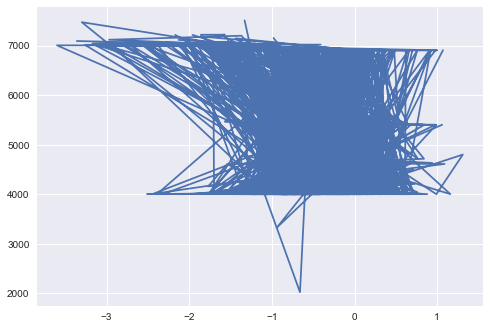

In [132]:
import seaborn as sns
sns.set_style("darkgrid")

plt.figure()
plt.plot(P8Dis.P8MEA_FSM6CLA1A, P8Dis.ESTAB_x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EB081D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017F1FF60>]], dtype=object)

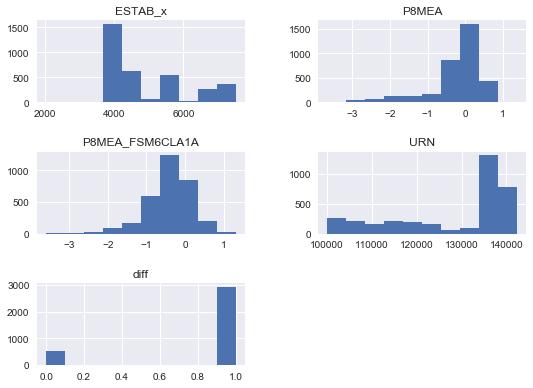

In [133]:
P8Dis.hist()
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.60,
                    wspace=0.35)
pl.show()

Basically the disadvantaged students and non-disadvantaged students are following two different distributions, see 'diff' histogram.  so what kind of modelling? maybe predict P8 measure based on intake of pupils. so join P8 measures with original dataset from earlier and model the outcomes.